In [3]:
import os
from itertools import combinations
from collections import defaultdict
import networkx as nx
os.chdir('/home')

In [4]:
data_labels = 'data/train_labels.txt'

## Load the data into array

In [5]:
arr = []
with open(data_labels, 'r') as file:
    for line in file:
        data = line.split(' ')
        data[1:] = [int(datum) for datum in data[1:]]
        arr.append(data)

## Utility Functions for Generating Adjacency Lists

In [6]:
def generate_adjacency_lists(arr):
    """Make an adjacency list."""
    adj = defaultdict(lambda: defaultdict(int))
    for line in arr:
        combs = combinations(line[1:], 2)
        for combo in combs:
            update_node(adj, combo[0], combo[1])
    return adj
            
            
def update_node(adj, n1, n2):
    adj[n1][n2] += 1
    adj[n2][n1] += 1
    
def prune_adjacency(adjacency_lists, min_appearances=100):
    nodes_deleted = []
    edges_deleted = []
    for node in adjacency_lists:
        if n_visited(adjacency_lists, node) < min_appearances:
            nodes_deleted.append(node)
    
    # Delete the nodes
    for node in nodes_deleted:
        del adjacency_lists[node]
            
    # Delete corresponding edges as well
    for node, edges in adjacency_lists.items():
        for edge_id in edges.keys():
            if edge_id in nodes_deleted:
                edges_deleted.append((node, edge_id))
    
    for node, edge in edges_deleted:
        edges = adjacency_lists.get(node)
        del edges[edge]
                
def n_visited(adjacency_lists, node):
    edges = adjacency_lists[node]
    
    return sum(edges.values())

def n_connected(adjacency_lists, node):
    return len(adjacency_lists[node].values())

## Run and Prune

In [7]:
adj = generate_adjacency_lists(arr)
print("Nodes before pruning: {}".format(len(adj)))
prune_adjacency(adj, min_appearances=25000)
print("Nodes after pruning: {}".format(len(adj)))

Nodes before pruning: 3862
Nodes after pruning: 218


## Graph Related Helper Functions

In [10]:
def generate_graph(adjacency_list):
    G = nx.Graph()
    
    # Add nodes
    for node in adjacency_list.keys():
        G.add_node(node)
    
    for node, edges in adjacency_list.items():
        for edge, weight in edges.items():
            G.add_edge(node, edge, weight=weight)
    
    return G
    
def n_visited(adjacency_lists, node):
    edges = adjacency_lists[node]
    
    return sum(edges.values())

## Generate Graph

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline


G = generate_graph(adj)
pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, 'weight')

max_weight = max(weights.values())
cmap_weights = [weight/max_weight for weight in weights.values()]

## Run Markov Clustering

In [61]:
import markov_clustering as mc
matrix = nx.to_scipy_sparse_matrix(G)
result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

NetworkXError: Node 61 has no position.

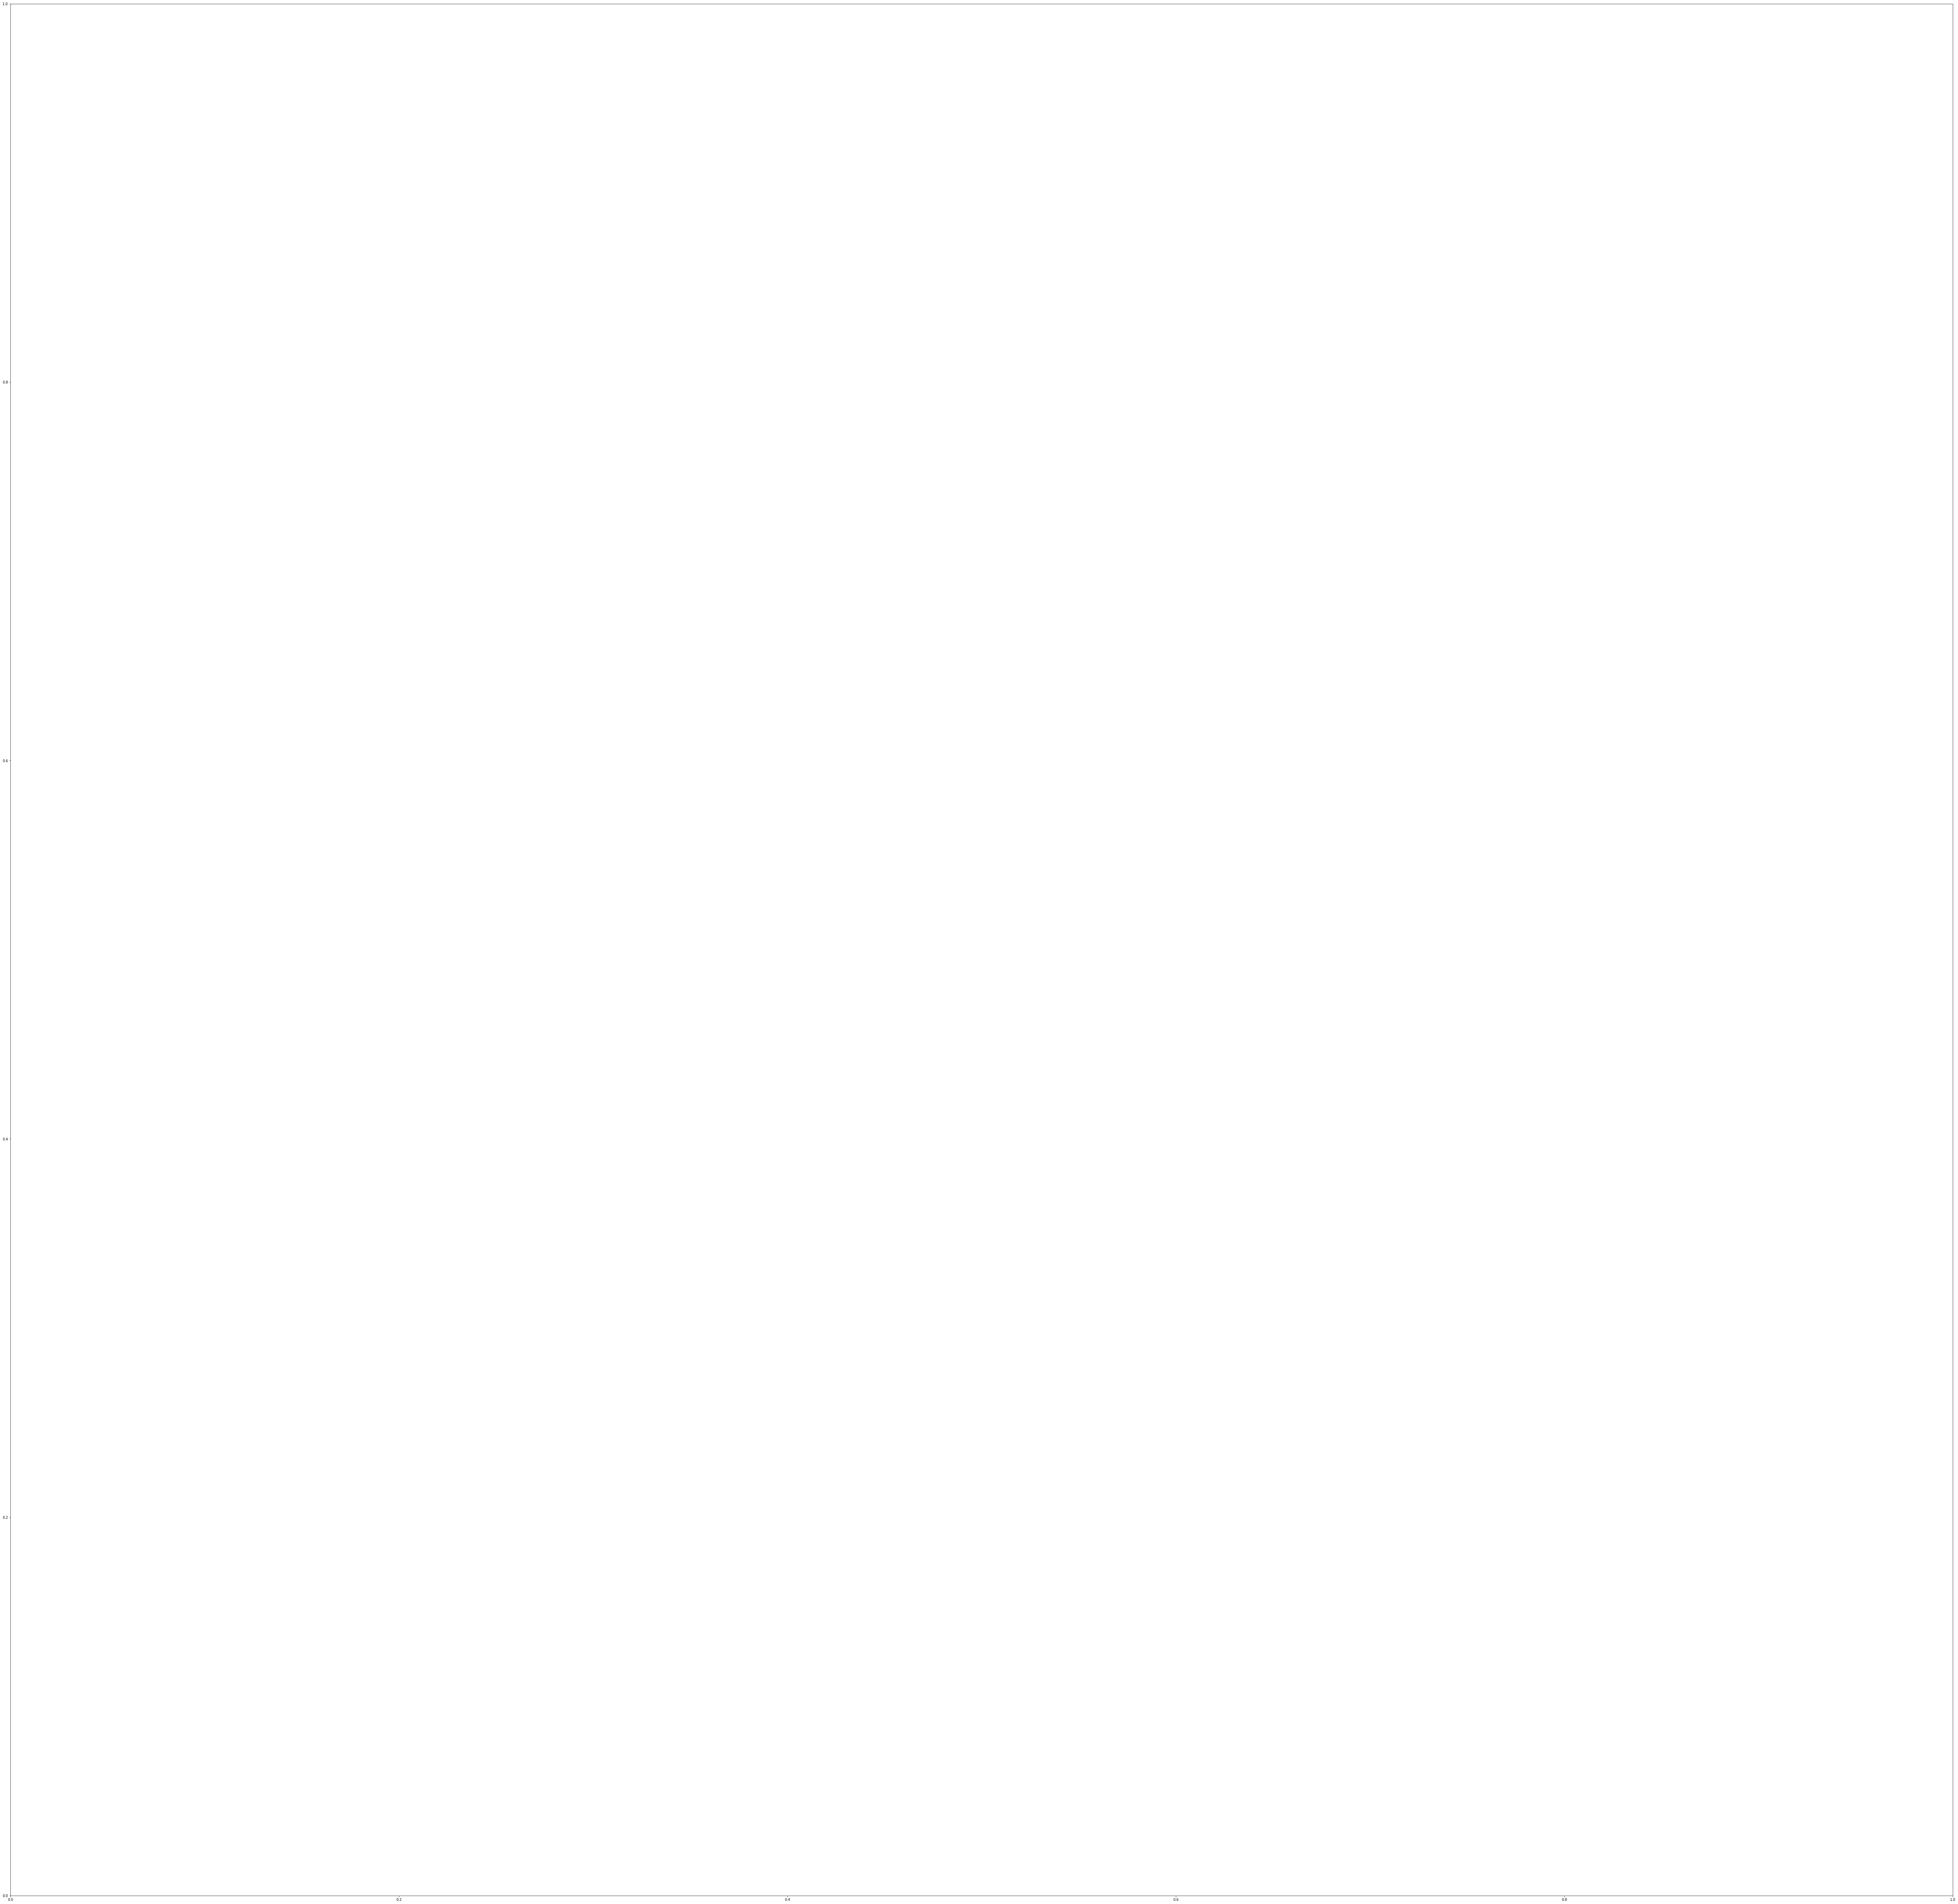

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(100, 100))
plt.subplot(111)

mc.draw_graph(matrix, clusters, pos=pos, node_size=1500, with_labels=False, edge_color=cmap_weights)

In [60]:
clusters

[(0,
  9,
  10,
  21,
  22,
  23,
  24,
  29,
  30,
  31,
  33,
  39,
  40,
  41,
  42,
  43,
  44,
  49,
  50,
  51,
  52,
  56,
  57,
  62,
  63,
  64,
  65,
  83,
  84,
  90,
  91,
  92,
  94,
  100,
  101,
  102,
  124,
  126,
  127,
  128,
  130,
  149,
  150,
  155,
  157,
  172,
  174,
  175,
  176,
  177,
  178,
  180,
  183,
  186,
  187,
  191,
  194,
  197,
  198,
  199,
  201,
  208,
  212,
  214,
  215,
  217),
 (1, 2, 3, 4, 58, 59, 89, 137, 192, 193, 195, 207),
 (5,
  6,
  7,
  8,
  20,
  25,
  26,
  27,
  28,
  34,
  35,
  54,
  55,
  60,
  72,
  73,
  79,
  80,
  81,
  82,
  85,
  86,
  87,
  98,
  99,
  104,
  108,
  111,
  112,
  113,
  129,
  131,
  132,
  133,
  135,
  140,
  141,
  142,
  143,
  145,
  146,
  147,
  148,
  151,
  154,
  164,
  168,
  170,
  181,
  184,
  188,
  189,
  196,
  200,
  203,
  204,
  209,
  210),
 (11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  32,
  45,
  46,
  47,
  48,
  61,
  66,
  68,
  88,
  93,
  97,
  121,
  122,
  123,
 

In [32]:
matrix = nx.to_scipy_sparse_matrix(G)

In [35]:
import markov_clustering as mc
result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

In [37]:
mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")

16